In [1]:
# topic: accessing text corpora and lexical resources
import nltk
print(nltk.corpus.gutenberg.fileids())
emma = nltk.corpus.gutenberg.words("austen-emma.txt")
print(len(emma))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
192427


In [3]:
print(type(emma))

<class 'nltk.corpus.reader.util.StreamBackedCorpusView'>


In [8]:
# get the info of gutenberg corpus
from nltk.corpus import gutenberg
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print("char:{:6d}, word:{:6d}, sents:{:5d}, vocab:{:5d}, avg word len:{:2d} avg sent len:{:2d}, name:{}".format(
        num_chars, num_words, num_sents, num_vocab, round(num_chars/num_words), round(num_words/num_sents), fileid))
    

char:887071, word:192427, sents: 7752, vocab: 7344, avg word len: 5 avg sent len:25, name:austen-emma.txt
char:466292, word: 98171, sents: 3747, vocab: 5835, avg word len: 5 avg sent len:26, name:austen-persuasion.txt
char:673022, word:141576, sents: 4999, vocab: 6403, avg word len: 5 avg sent len:28, name:austen-sense.txt
char:4332554, word:1010654, sents:30103, vocab:12767, avg word len: 4 avg sent len:34, name:bible-kjv.txt
char: 38153, word:  8354, sents:  438, vocab: 1535, avg word len: 5 avg sent len:19, name:blake-poems.txt
char:249439, word: 55563, sents: 2863, vocab: 3940, avg word len: 4 avg sent len:19, name:bryant-stories.txt
char: 84663, word: 18963, sents: 1054, vocab: 1559, avg word len: 4 avg sent len:18, name:burgess-busterbrown.txt
char:144395, word: 34110, sents: 1703, vocab: 2636, avg word len: 4 avg sent len:20, name:carroll-alice.txt
char:457450, word: 96996, sents: 4779, vocab: 8335, avg word len: 5 avg sent len:20, name:chesterton-ball.txt
char:406629, word: 860

In [9]:
# other corpus: webtext, nps_chat, brown, retuters, inaugural address, 

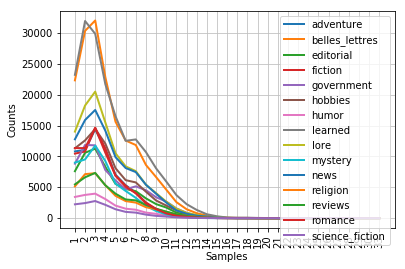

In [14]:
# conditional freq dist
# counting words by genre
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, len(word))
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
cfd.plot()

In [16]:
# generate random text with bigrams, get stuck in loops
def generate_model(cdist, word, num=15):
    for idx in range(num):
        print(word, end=' ')
        word = cdist[word].max()
    
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
print(cfd['name'])
generate_model(cfd, 'name')

<FreqDist with 40 samples and 100 outcomes>
name of the land of the land of the land of the land of the 

In [18]:
# wordlist corpora
# the words corpus is the /usr/share/dict/words file form unix

# detect the unusual words
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

print(unusual_words(nltk.corpus.nps_chat.words()))

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', 'aggravated', 'agurlwithbigguns', 'ahah', 'ahahah', 'ahahh', 'ahahha', 'ahh', 'ahhah', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'aiiiiiiiiiiiiiiiiiiiiiiii', 'aiken', 'aime', 'akdt', 'akon', 'akron', 'akst', 'aligator', 'allergies', 'allo', 'allowed', 'aloha', 'alohaaa', 'alohas', 'alot', 'alotta', 'alternatives', 'alterz', 'alwys', 'alzheimers', 'amazingness', 'americans', 'anithing', 'ans', 'answering', 'answers', 'antidepressants', 'anygirl', 'anymore', 'anythin', 'anytime', 'anyyyyyyyyyyyyyyyyy', 'aok', 'apoligize', 'appearently', 'appears', 'applaudes', 'appleton', 'appologise', 'appologize', 'aqwesome', 'arggghhh', 'argh', 'armtnpeat', 'arrested', 'arrived', 'arround', 'asked', 'askin', 'asking', 'asks', 'asl', 'asnwer', 

In [20]:
# A word puzzle: how many words can you make from the letters below, the word must contain the center letter, each only can be used once per word.
# E G I
# V R V
# O N L
# example: region
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
answer = [w for w in wordlist if len(w)>=4 and obligatory in w and nltk.FreqDist(w)<=puzzle_letters]
print(answer)
print(len(answer))

['enrol', 'ergon', 'genro', 'girl', 'girn', 'giro', 'giver', 'glor', 'glore', 'glover', 'goer', 'goner', 'gore', 'gorlin', 'govern', 'grein', 'grin', 'groin', 'grove', 'grovel', 'ignore', 'inro', 'involver', 'iron', 'irone', 'levir', 'lienor', 'lier', 'liner', 'linger', 'lire', 'liver', 'livor', 'livre', 'loir', 'longer', 'lore', 'lori', 'lorn', 'lover', 'lovering', 'negro', 'nigre', 'noiler', 'noir', 'nori', 'norie', 'ogler', 'ogre', 'oiler', 'oner', 'oriel', 'orle', 'over', 'overling', 'regin', 'region', 'reign', 'rein', 'renvoi', 'reoil', 'revolving', 'rigol', 'rile', 'rine', 'ring', 'ringe', 'ringle', 'rive', 'rivel', 'riven', 'roil', 'role', 'rone', 'rove', 'roving', 'vergi', 'veri', 'vier', 'vigor', 'viner', 'violer', 'vire', 'vireo', 'virl', 'virole', 'viron', 'viver', 'girl', 'iron', 'over', 'ring']
92


In [23]:
# comparative wordlists
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [24]:
translate = dict(swadesh.entries(['en', 'fr']))
print(translate['I'])
print(translate['good'])

je
bon


In [30]:
# wordnet, synset, and lemma
from nltk.corpus import wordnet as wn
print(wn.synsets('motorcar'))
print(wn.synset('car.n.01').lemma_names())
print(wn.synset('car.n.02').lemma_names())
print(wn.synset('car.n.02').definition())
print(wn.synset('car.n.01').examples())

[Synset('car.n.01')]
['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
a wheeled vehicle adapted to the rails of railroad
['he needs a car to get to work']


In [32]:
print(wn.lemma('car.n.01.automobile').synset())
print(wn.lemma('car.n.01.automobile').name())

Synset('car.n.01')
automobile


In [35]:
# semantic similarith
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')
tiger = wn.synset('tiger.n.01')
print(cat.min_depth())
print(dog.min_depth())
print(tiger.min_depth())

13
8
4


In [36]:
print(cat.path_similarity(dog))
print(cat.path_similarity(tiger))

0.2
0.09090909090909091


In [37]:
# input method for 9 keys
# 1      2(ABC) 3(DEF)
# 4(GHI) 5(JKL) 6(MNO)
# 7(PQRS)8(TUV) 9(WXYZ)
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
# for input list [4, 6, 5, 3], please give the word list
word_list_this = [w for w in wordlist if re.search("^[g-i][m-o][j-l][d-f]$", w)]
print(word_list_this)

['gold', 'golf', 'hold', 'hole']
